In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G1 = nx.DiGraph()

In [3]:
G1.add_node(1)

In [4]:
G1.nodes[1]['T1'] = 'The Rise of MXenes'
G1.nodes[1]['TY'] = 'JOUR'
G1.nodes[1]['AU'] = {'Gogotsi, Yury', 'Anasori, Babak'}
G1.nodes[1]['Y1'] = '2019/08/27'
G1.nodes[1]['PY'] = '2019'
G1.nodes[1]['DA'] = '2019/08/27'
G1.nodes[1]['N1'] = 'doi: 10.1021/acsnano.9b06394'
G1.nodes[1]['DO'] = '10.1021/acsnano.9b06394'
G1.nodes[1]['T2'] = 'ACS Nano'
G1.nodes[1]['JF'] = 'ACS Nano'
G1.nodes[1]['JO'] = 'ACS Nano'
G1.nodes[1]['SP'] = 8491
G1.nodes[1]['EP'] = 8494
G1.nodes[1]['VL'] = 13
G1.nodes[1]['IS'] = 8
G1.nodes[1]['PB'] = 'American Chemical Society'
G1.nodes[1]['SN'] = '1936-0851'
G1.nodes[1]['M3'] = 'doi: 10.1021/acsnano.9b06394'
G1.nodes[1]['UR'] = 'https://doi.org/10.1021/acsnano.9b06394'

In [5]:
# nx.draw(G1, node_color=color_map, with_labels=True, width = wt)

In [6]:
G1.add_edge(1, 2, weight=10 )

In [7]:
G1.nodes[2]['T1'] = 'Ultrathin Two-Dimensional Nanomaterials'
G1.nodes[2]['TY'] = 'JOUR'
G1.nodes[2]['AU'] = 'Zhang, Hua'
G1.nodes[2]['Y1'] = '2015/10/27'
G1.nodes[2]['PY'] = '2015'
G1.nodes[2]['DA'] = '2015/10/27'
G1.nodes[2]['N1'] = 'doi: 10.1021/acsnano.5b05040'
G1.nodes[2]['DO'] = '10.1021/acsnano.5b05040'
G1.nodes[2]['T2'] = 'ACS Nano'
G1.nodes[2]['JF'] = 'ACS Nano'
G1.nodes[2]['JO'] = 'ACS Nano'
G1.nodes[2]['SP'] = 9451
G1.nodes[2]['EP'] = 9469
G1.nodes[2]['VL'] = 9
G1.nodes[2]['IS'] = 10
G1.nodes[2]['PB'] = 'American Chemical Society'
G1.nodes[2]['SN'] = '1936-0851'
G1.nodes[2]['M3'] = 'doi: 10.1021/acsnano.5b05040'
G1.nodes[2]['UR'] = 'https://doi.org/10.1021/acsnano.5b05040'

In [8]:
# nx.draw(G1, node_color=color_map, with_labels=True, width = wt)

In [9]:
G1.add_edge(1, 3, weight=10)

In [10]:
G1.nodes[3]['T1'] ='An Update from Flatland'
G1.nodes[3]['TY'] = 'JOUR'
G1.nodes[3]['AU'] = {'Andrew T. S. Wee', 'Mark C. Hersam', 'Manish Chhowalla', 'Yury Gogotsi'}
G1.nodes[3]['Y1'] = '2016/09/27'
G1.nodes[3]['PY'] = '2016'
G1.nodes[3]['DA'] = '2016/09/27'
G1.nodes[3]['N1'] = 'doi: 10.1021/acsnano.6b06087'
G1.nodes[3]['DO'] = '10.1021/acsnano.6b06087'
G1.nodes[3]['T2'] = 'ACS Nano'
G1.nodes[3]['JF'] = 'ACS Nano'
G1.nodes[3]['JO'] = 'ACS Nano'
G1.nodes[3]['SP'] = 8121
G1.nodes[3]['EP'] = 8123
G1.nodes[3]['VL'] = 10
G1.nodes[3]['IS'] = 9
G1.nodes[3]['PB'] = 'American Chemical Society'
G1.nodes[3]['SN'] = '1936-0851'
G1.nodes[3]['M3'] = 'doi: 10.1021/acsnano.6b06087'
G1.nodes[3]['UR'] = 'https://doi.org/10.1021/acsnano.6b06087'

In [11]:
# nx.draw(G1, node_color=color_map, with_labels=True, width = wt)

In [12]:
G1.add_edge(1,4, weight=10)

In [13]:
G1.add_edge(2,6, weight=5)
G1.add_edge(2,7, weight=5)
G1.add_edge(2,8, weight=5)
G1.add_edge(2,9, weight=5)
G1.add_edge(3,10, weight=5)
G1.add_edge(3,11, weight=5)
G1.add_edge(3,12, weight=5)
G1.add_edge(3,13, weight=5)
G1.add_edge(4,14, weight=5)
G1.add_edge(4,15, weight=5)
G1.add_edge(4,16, weight=5)
G1.add_edge(4,17, weight=5)
G1.add_edge(5,18, weight=5)
G1.add_edge(5,19, weight=5)
G1.add_edge(5,20, weight=5)
G1.add_edge(5,21, weight=5)


In [14]:
# nx.draw(G1, node_color=color_map, with_labels=True, width = wt)

In [15]:
G1.add_edge(6,22, weight=2.5)
G1.add_edge(6,23, weight=2.5)
G1.add_edge(6,24, weight=2.5)
G1.add_edge(6,25, weight=2.5)
G1.add_edge(7,26, weight=2.5)
G1.add_edge(7,27, weight=2.5)
G1.add_edge(7,28, weight=2.5)
G1.add_edge(7,29, weight=2.5)
G1.add_edge(8,30, weight=2.5)
G1.add_edge(8,31, weight=2.5)
G1.add_edge(8,32, weight=2.5)
G1.add_edge(8,33, weight=2.5)

In [16]:
# nx.draw(G1, node_color=color_map, with_labels=True, width = wt)

In [17]:

G1.add_edge(22,34, weight=1.25)
G1.add_edge(22,35, weight=1.25)
G1.add_edge(22,36, weight=1.25)
G1.add_edge(22,37, weight=1.25)

In [18]:
G1.nodes[6]['T1'] ='Electric Field Effect in Atomically Thin Carbon Films'
G1.nodes[6]['TY'] = 'JOUR'
G1.nodes[6]['AU'] = {'Novoselov, K. S.','Geim, A. K.','Morozov, S. V.','Jiang, D.','Zhang, Y.','Dubonos, S. V.','Grigorieva, I. V.','Firsov, A. A.'}
G1.nodes[6]['Y1'] = '2004/10/22'
G1.nodes[6]['PY'] = '2004'
G1.nodes[6]['DA'] = '2004/10/22'
G1.nodes[6]['N1'] = 'doi: 10.1126/science.1102896'
G1.nodes[6]['DO'] = '10.1126/science.1102896'
G1.nodes[6]['T2'] = 'Science'
G1.nodes[6]['JF'] = 'Science'
G1.nodes[6]['JO'] = 'Science'
G1.nodes[6]['SP'] = 666
G1.nodes[6]['EP'] = 669
G1.nodes[6]['VL'] = 306
G1.nodes[6]['IS'] = 5696
G1.nodes[6]['PB'] = 'American Association for the Advancement of Science'
G1.nodes[6]['Y2'] = '2022/10/03'
G1.nodes[6]['M3'] = 'doi: 10.1126/science.1102896'
G1.nodes[6]['UR'] = 'https://doi.org/10.1126/science.1102896'
G1.nodes[6]['N2'] = 'We describe monocrystalline graphitic films, which are a few atoms thick but are nonetheless stable under ambient conditions, metallic, and of remarkably high quality. The films are found to be a two-dimensional semimetal with a tiny overlap between valence and conductance bands, and they exhibit a strong ambipolar electric field effect such that electrons and holes in concentrations up to 1013 per square centimeter and with room-temperature mobilities of ?10,000 square centimeters per volt-second can be induced by applying gate voltage.'
G1.nodes[6]['AB'] = 'We describe monocrystalline graphitic films, which are a few atoms thick but are nonetheless stable under ambient conditions, metallic, and of remarkably high quality. The films are found to be a two-dimensional semimetal with a tiny overlap between valence and conductance bands, and they exhibit a strong ambipolar electric field effect such that electrons and holes in concentrations up to 1013 per square centimeter and with room-temperature mobilities of ?10,000 square centimeters per volt-second can be induced by applying gate voltage.'

In [19]:
color_map = []
wt = []
for node in G1:
    if node == 1 :
        color_map.append('red')
        wt.append(5)
    if node<=5 and node>1: 
        color_map.append('blue') 
        wt.append(4)
    if node<=21 and node>5 :
        color_map.append('grey')
        wt.append(3)
    if node>21 and node<=33:
        color_map.append('yellow')
        wt.append(2)
    if node>33:
        color_map.append('orange')
        wt.append(1)

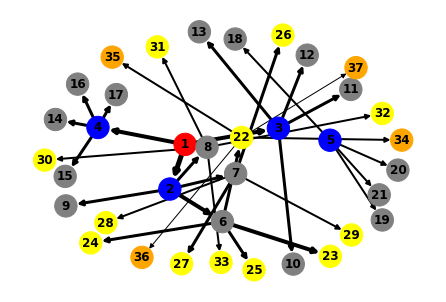

In [20]:
nx.draw(G1, node_color=color_map, with_labels=True, width = wt, font_weight = 'bold', node_size = 500)

In [21]:
G1.nodes.data()

NodeDataView({1: {'T1': 'The Rise of MXenes', 'TY': 'JOUR', 'AU': {'Anasori, Babak', 'Gogotsi, Yury'}, 'Y1': '2019/08/27', 'PY': '2019', 'DA': '2019/08/27', 'N1': 'doi: 10.1021/acsnano.9b06394', 'DO': '10.1021/acsnano.9b06394', 'T2': 'ACS Nano', 'JF': 'ACS Nano', 'JO': 'ACS Nano', 'SP': 8491, 'EP': 8494, 'VL': 13, 'IS': 8, 'PB': 'American Chemical Society', 'SN': '1936-0851', 'M3': 'doi: 10.1021/acsnano.9b06394', 'UR': 'https://doi.org/10.1021/acsnano.9b06394'}, 2: {'T1': 'Ultrathin Two-Dimensional Nanomaterials', 'TY': 'JOUR', 'AU': 'Zhang, Hua', 'Y1': '2015/10/27', 'PY': '2015', 'DA': '2015/10/27', 'N1': 'doi: 10.1021/acsnano.5b05040', 'DO': '10.1021/acsnano.5b05040', 'T2': 'ACS Nano', 'JF': 'ACS Nano', 'JO': 'ACS Nano', 'SP': 9451, 'EP': 9469, 'VL': 9, 'IS': 10, 'PB': 'American Chemical Society', 'SN': '1936-0851', 'M3': 'doi: 10.1021/acsnano.5b05040', 'UR': 'https://doi.org/10.1021/acsnano.5b05040'}, 3: {'T1': 'An Update from Flatland', 'TY': 'JOUR', 'AU': {'Andrew T. S. Wee', 'Mar

In [22]:
G1.nodes.data('T1')

NodeDataView({1: 'The Rise of MXenes', 2: 'Ultrathin Two-Dimensional Nanomaterials', 3: 'An Update from Flatland', 4: None, 6: 'Electric Field Effect in Atomically Thin Carbon Films', 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 5: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None, 25: None, 26: None, 27: None, 28: None, 29: None, 30: None, 31: None, 32: None, 33: None, 34: None, 35: None, 36: None, 37: None}, data='T1')